In [76]:
import matplotlib.pyplot as plt
import json
import numpy as np
from rich import print

In [77]:
with open("../few_shot_results_complete.json", "r") as f:
    data = json.load(f)

print(data)

{
    'K': [0, 1, 2, 4],
    'ACC': [0.7161246538162231, 0.7196815609931946, 0.7044376730918884, 0.7506775259971619],
    'ACC_MODEL': 0.8279697299003601
}

In [78]:

def plot_fewshot(data):
    kshot = data["K"][1:]
    acc = data["ACC"][1:]
    ref = data["ACC_MODEL"]

    plt.figure(figsize=(8, 5))
    plt.plot(kshot, acc, marker="o")
    plt.axhline(ref, ls="--", c="k", label="Reference Model")
    plt.axhline(acc[0], ls=":", c="k", label="Baseline Model (K=0)")


    plt.xscale("log", base=2)  # Log scale base 2 for powers of 2
    # plt.xticks(kshot, labels=[str(k) for k in kshot])  # Ensure integer labels
    plt.xlabel("Number of examples")
    plt.ylabel("Micro-averaged Accuracy")
    plt.title("Generalization Data Efficiency on Sketch")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()

    plt.tight_layout()
    plt.show()

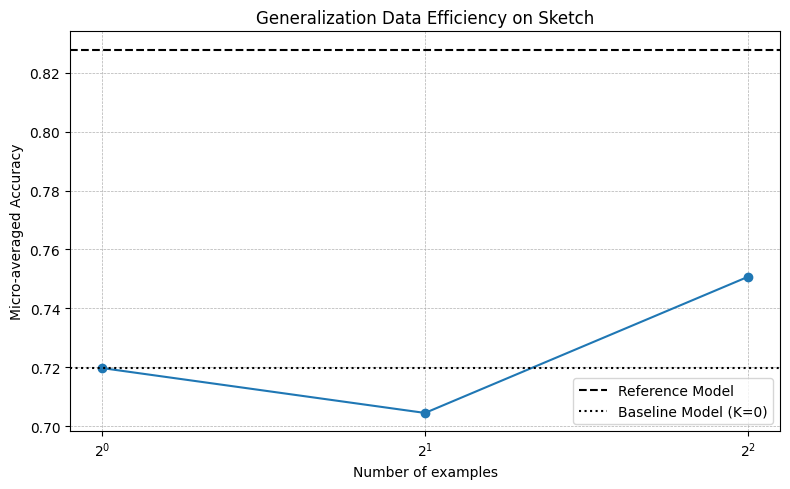

In [79]:
plot_fewshot(data)

In [82]:
# now with error bars

import json
import glob
import numpy as np
import matplotlib.pyplot as plt
import os

from rich import print

def load_all_jsons(folder):
    paths = glob.glob(os.path.join(folder, "few_shot_results_complete_*.json"))  # assuming *_<seed>.json pattern
    all_accs = []

    for path in paths:
        print(path)

    for path in paths:
        with open(path, "r") as f:
            data = json.load(f)
            all_accs.append(data["ACC"])

    return np.array(all_accs), data["K"], data["ACC_MODEL"]  # assuming K and ACC_MODEL are the same across


import numpy as np
import matplotlib.pyplot as plt

def plot_fewshot_with_std(accs, K, acc_model, std_multiplier=1):
    K = np.array(K)
    accs = np.array(accs)

    # Separate K=0 and K>0
    kshot = K[1:]
    acc_kpos = accs[:, 1:]
    acc_k0 = accs[:, 0]

    # Statistics for K>0
    mean_acc = np.mean(acc_kpos, axis=0)
    std_acc = np.std(acc_kpos, axis=0)

    # Statistics for K=0
    baseline_mean = np.mean(acc_k0)
    baseline_std = np.std(acc_k0)

    plt.figure(figsize=(8, 5))

    # Plot mean ± std for K > 0
    plt.plot(kshot, mean_acc, marker="o", label="Baseline")
    plt.fill_between(
        kshot,
        mean_acc - std_multiplier * std_acc,
        mean_acc + std_multiplier * std_acc,
        alpha=0.2,
        label=r"$\pm$" + f"{std_multiplier  if std_multiplier > 1 else ''  }" + r"$\sigma$"
    )

    # Plot reference model
    plt.axhline(acc_model, ls="--", c="k", label="Reference Model")

    # Plot baseline with mean ± std as horizontal band
    plt.axhline(baseline_mean, ls=":", c="k", label=r"$K=0$")

    plt.xscale("log", base=2)
    plt.xlabel("Number of examples")
    plt.ylabel("Micro-averaged Accuracy")
    plt.title("Generalization Data Efficiency on Sketch")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.savefig("PACSFewShot.png", dpi=1028, bbox_inches="tight")
    plt.show()


In [83]:
# Example usage:
accs, K, acc_model = load_all_jsons("../few_shot_temp/")

../few_shot_temp/few_shot_results_complete_6.json

../few_shot_temp/few_shot_results_complete_5.json

../few_shot_temp/few_shot_results_complete_9.json

../few_shot_temp/few_shot_results_complete_1.json

../few_shot_temp/few_shot_results_complete_4.json

../few_shot_temp/few_shot_results_complete_0.json

../few_shot_temp/few_shot_results_complete_7.json

../few_shot_temp/few_shot_results_complete_3.json

../few_shot_temp/few_shot_results_complete_8.json

../few_shot_temp/few_shot_results_complete_2.json

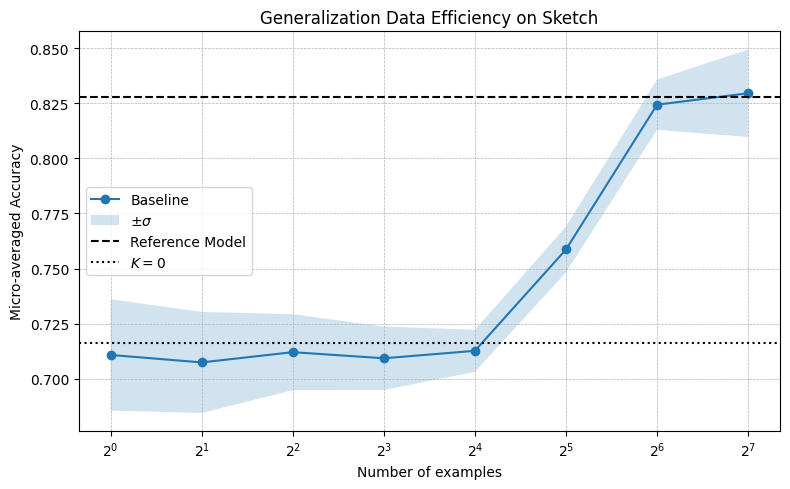

In [84]:
plot_fewshot_with_std(accs, K, acc_model)